In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
stats = './result/500/stats.txt'
df = pd.read_csv(stats)

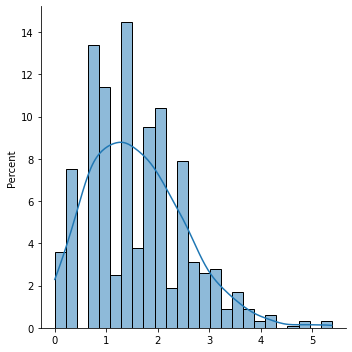

In [4]:
df.describe()
errors = (1.0 - df['n#intx_cand_mst_best'] / df['n#intx_cand_mst']) * 100.0
#errors.hist(bins = 100)
#df.head()
sns.displot(errors, kind='hist', stat='percent', kde=True)
#df.apply(lambda row: row['#intx_cand_mst_best'] / row['n#intx_cand_mst'])

In [70]:
n_nodes = 30
n_neighbours = 20
n_samples = 100
index = 0


cols = [str(i) for i in range(n_neighbours)]
#df_stat = pd.DataFrame({'pos':[], 'value':[]})

d = {}; first = True
for index in range(n_samples):
    file = f'result/vn_{n_nodes}/beta/{index}.txt'
    with open(file, 'r') as f:
        lines = f.readlines()

    for i in range(n_neighbours):
        d[str(i)] = 0

    for line in lines[1:-2]:
        items = line.strip().split()
        #print(items[1:])
        for item in items[1:]:
            if item not in d.keys():
                d[item] = 1
            else:
                d[item] += 1
        df = pd.DataFrame([d])

    #compute df_stat
    values = [d[x] for x in d.keys()]
    pos = [x for x in d.keys()]
    df_stat_one = pd.DataFrame({'pos': pos, 'value': values})

    if first:
        first = False
        df_final = df
        df_stat_final = df_stat_one
    else:
        df_final = pd.concat([df_final, df], ignore_index=True, axis=0)
        df_stat_final = pd.concat([df_stat_final, df_stat_one], ignore_index=True, axis=0)
#print(df_final)
df_final.describe()
df_stat_final.describe()


#print(df_final.mean(), df_final.std())

,value
count,2000.00000
mean,7.50000
std,9.13448
min,0.00000
25%,1.00000
50%,3.00000
75%,11.00000
max,30.00000


<AxesSubplot:xlabel='pos', ylabel='value'>

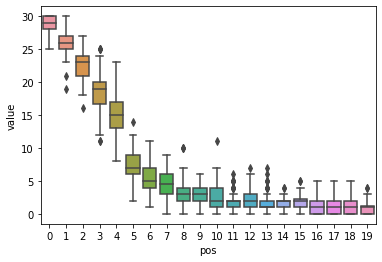

In [78]:
ax = plt.subplot(111)
x = [i for i in range(n_neighbours)]
y = (df_final.mean() / n_nodes).values
std = (df_final.std() / n_nodes).values

data = { "position": x,
         "mean": y.tolist(),
         "y_min" : (y - std).tolist(),
         "y_max" : (y + std).tolist() }
#print(data)
df_box = pd.DataFrame(data)

sns.boxplot(x='pos', y='value', data=df_stat_final)
#sns.swarmplot(x='pos', y='value', data=df_stat_final, color='grey')
#print(data)
#sns.barplot(x=x, y=y, ax=ax)#, palette="deep")


In [44]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [32]:
tips = sns.load_dataset('tips')
# sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
#                split=True, inner="quart", linewidth=1,
#                palette={"Yes": "b", "No": ".85"})
# sns.despine(left=True)
tips.head()
#tips.describe()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
